# Visualizing selected outputs from DeepSort

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display, clear_output, HTML
import time
import glob

In [2]:
CSV_PATH = "../sampled_frames.csv"
LOCAL_CROPS_DIR = "../seq_img/"

In [3]:
# Load the CSV
df = pd.read_csv(CSV_PATH)
df["frame_id_int"] = df["frame_id"].astype(int)
df = df.sort_values(["sequence", "track_id", "frame_id_int"])

In [4]:
# Add a column for local file paths (just the filename)
df["local_path"] = df["crop_path"].apply(lambda x: os.path.join(LOCAL_CROPS_DIR, x.lstrip("./")))

In [5]:
# Check which files actually exist locally
df["exists_locally"] = df["local_path"].apply(os.path.exists)

print(f"Total rows in CSV: {len(df)}")
print(f"Files available locally: {df['exists_locally'].sum()}")
# print(f"Files in {LOCAL_CROPS_DIR}: {len(glob.glob(os.path.join(LOCAL_CROPS_DIR, '*.jpg')))}")

Total rows in CSV: 269
Files available locally: 269


In [6]:
# Get tracks that have local images
local_tracks = df[df["exists_locally"]].groupby(["sequence", "track_id"]).size()
local_tracks = local_tracks[local_tracks >= 3].sort_values(ascending=False)  # At least 3 frames

print(f"\nTracks with local images (3+ frames):")
for (seq, tid), count in local_tracks.head(10).items():
    print(f"  Sequence: {seq}, Track ID: {tid}, Frames: {count}")


Tracks with local images (3+ frames):
  Sequence: 2024-04-09-16-18-07_mapping_tartu_streets/camera_fl, Track ID: 20, Frames: 13
  Sequence: 2024-07-16-13-05-46_mapping_tartu_streets/camera_narrow_front, Track ID: 99, Frames: 13
  Sequence: 2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_narrow_front, Track ID: 1243, Frames: 13
  Sequence: 2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_narrow_front, Track ID: 700, Frames: 13
  Sequence: 2024-08-16-16-03-30_mapping_tartu_streets/camera_narrow_front, Track ID: 2, Frames: 13
  Sequence: 2024-08-16-14-33-25_mapping_tartu_streets/camera_wide_front, Track ID: 2, Frames: 13
  Sequence: 2024-08-16-14-33-25_mapping_tartu_streets/camera_narrow_front, Track ID: 4, Frames: 13
  Sequence: 2024-08-16-13-56-40_mapping_tartu_streets/camera_wide_front, Track ID: 1, Frames: 13
  Sequence: 2024-07-16-14-21-41_mapping_tartu_streets/camera_narrow_front, Track ID: 307, Frames: 13
  Sequence: 202

In [7]:
df.head(20)

,sequence,track_id,frame_id,class_id,score,x1,y1,x2,y2,crop_path,img_path,width,height,sequence_id,label,anchor_frame,frame_id_int,local_path,exists_locally
128,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14900,2,0.939518,1127,1213,1603,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14900,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
129,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14904,2,0.933450,1124,1219,1608,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14904,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
130,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14908,2,0.935440,1120,1222,1615,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14908,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
131,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14912,2,0.936148,1117,1227,1617,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14912,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
132,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14916,2,0.937735,1114,1229,1622,1541,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14916,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
133,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14920,2,0.929620,1111,1234,1622,1541,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14920,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
134,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14924,2,0.934528,1108,1233,1626,1541,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14924,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
135,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14928,2,0.938470,1106,1233,1628,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14928,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
136,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14932,2,0.933068,1104,1232,1630,1542,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14932,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True
137,2024-04-09-16-18-07_mapping_tartu_streets/came...,20,14936,2,0.936894,1103,1232,1631,1541,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,/gpfs/space/projects/ml2024/2024-04-09-16-18-0...,2064,1544,seq_0010,hazard,14925,14936,../seq_img/gpfs/space/projects/ml2024/2024-04-...,True


In [12]:
def animate_track(sequence, track_id, delay=0.3, figsize=(10, 8)):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int")
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for idx, row in track_df.iterrows():
        img = Image.open(row["local_path"])
            
        ax.clear()
        ax.imshow(img)
        ax.set_title(f"Track {track_id} | Frame {row['frame_id']}", 
                        fontsize=14, fontweight='bold')
        ax.axis('off')
            
        display(fig)
        clear_output(wait=True)
        time.sleep(delay)

In [13]:
def show_track_grid(sequence, track_id, max_frames=20, cols=5, figsize=None, show_diagnostics=True):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int").head(max_frames)
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    n_frames = len(track_df)
    rows = (n_frames + cols - 1) // cols
    
    if figsize is None:
        figsize = (cols * 3, rows * 3.5)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Handle single row/column cases
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]
    
    for idx, (_, row) in enumerate(track_df.iterrows()):
        r = idx // cols
        c = idx % cols
        ax = axes[r][c]
        
        img = Image.open(row["local_path"])
        crop_w, crop_h = img.size
        ax.imshow(img)
        
        # Show frame, crop filename, and size
        title = f"Frame {row['frame_id']}\n{crop_w}x{crop_h}px"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    
    # Hide empty subplots
    for idx in range(n_frames, rows * cols):
        r = idx // cols
        c = idx % cols
        axes[r][c].axis('off')
    
    plt.suptitle(f"Track {track_id} in {sequence}\n", 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## Visualization

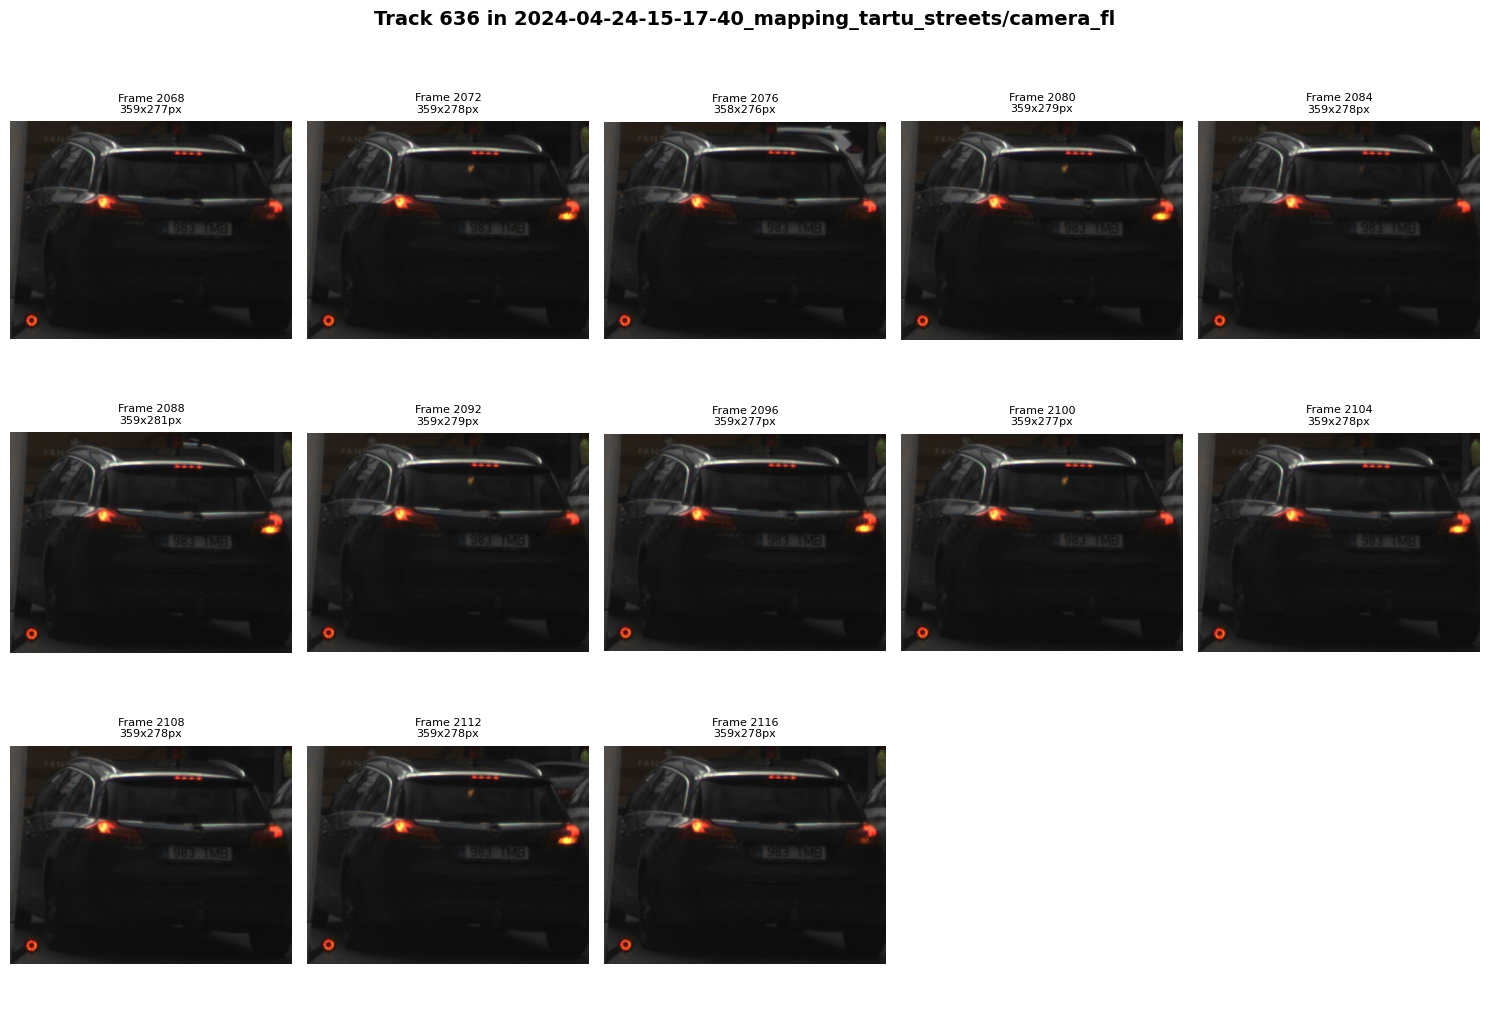

In [14]:
if len(local_tracks) > 0:
    seq, tid = local_tracks.index[16]
    show_track_grid(seq, tid, max_frames=60, cols=5)

### Animation

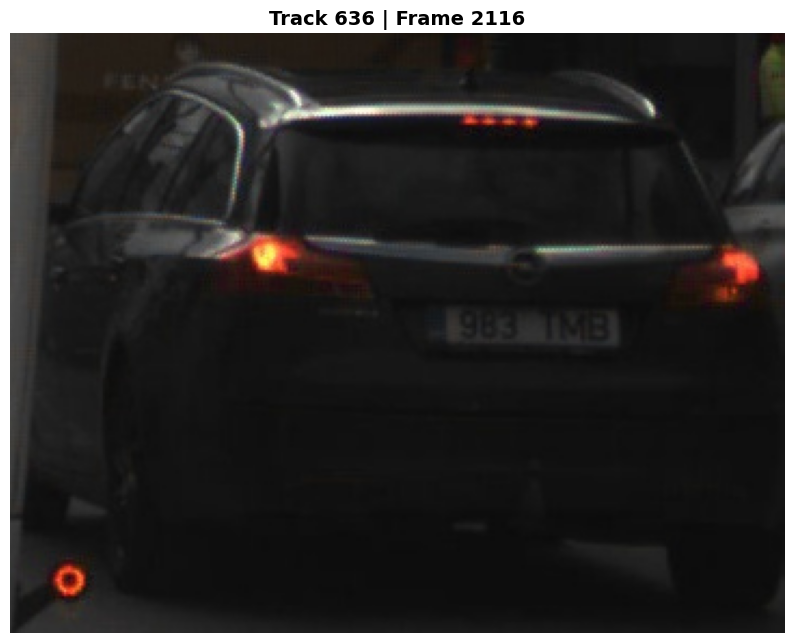

In [15]:
animate_track(seq, tid, delay=0.3)